# Canny Edge Detector

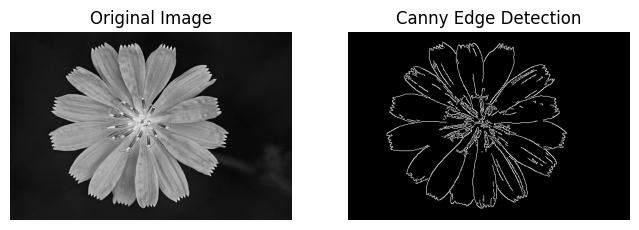

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection
edges = cv2.Canny(image, 100, 200)

# Display the result
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


## Image smoothing

You are allowed to use libraries in your implementation<br>


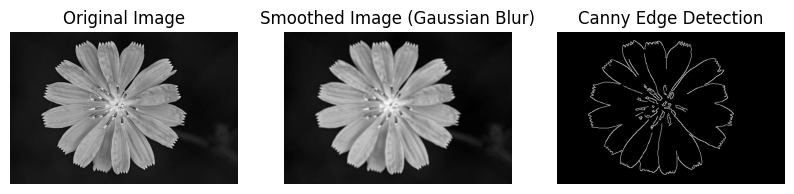

In [ ]:
# your code
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# smoothing
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(smoothed_image, 100, 200)


plt.figure(figsize=(10, 6))


plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()



## Gradient
Compute image gradient magnitude and angle<br>
You are allowed to use libraries in your implementation<br>

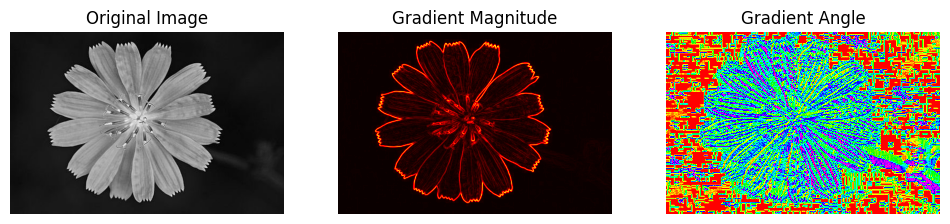

In [ ]:
# your code
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator to compute gradients along x and y axes
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
magnitude = cv2.magnitude(sobel_x, sobel_y)

# Compute the gradient angle
angle = cv2.phase(sobel_x, sobel_y, angleInDegrees=True)

# Display the results
plt.figure(figsize=(12, 8))


plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='hot')
plt.title('Gradient Magnitude')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(angle, cmap='hsv')
plt.title('Gradient Angle')
plt.axis('off')

plt.show()


## NMS
Perform non-maximum suppression
### You are **NOT** allowed to use libraries in your implementation<br>


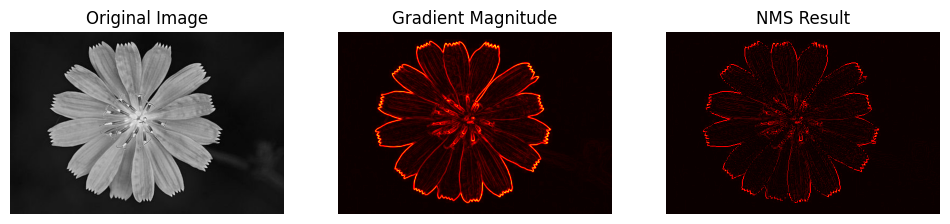

In [5]:
# your code
import numpy as np
import cv2
import matplotlib.pyplot as plt

def non_maximum_suppression(magnitude, angle):
    # Create an output image to store the results
    output = np.zeros_like(magnitude, dtype=np.float32)

    # Loop through each pixel in the image (ignoring the borders)
    height, width = magnitude.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Get the angle of the gradient at the current pixel
            ang = angle[i, j] % 180

            # Horizontal direction (0 degrees)
            if (0 <= ang < 22.5) or (157.5 <= ang < 180):
                neighbor1 = magnitude[i, j+1]
                neighbor2 = magnitude[i, j-1]
            # 45 degree direction
            elif (22.5 <= ang < 67.5):
                neighbor1 = magnitude[i+1, j-1]
                neighbor2 = magnitude[i-1, j+1]
            # Vertical direction (90 degrees)
            elif (67.5 <= ang < 112.5):
                neighbor1 = magnitude[i+1, j]
                neighbor2 = magnitude[i-1, j]
            # 135 degree direction
            else:
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]

            # Perform Non-Maximum Suppression: keep the maximum, suppress the rest
            if (magnitude[i, j] >= neighbor1) and (magnitude[i, j] >= neighbor2):
                output[i, j] = magnitude[i, j]
            else:
                output[i, j] = 0

    return output

# Load the image
image_path = '/content/flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator to compute gradients along x and y axes
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
magnitude = cv2.magnitude(sobel_x, sobel_y)

# Compute the gradient angle in degrees
angle = cv2.phase(sobel_x, sobel_y, angleInDegrees=True)

# Apply Non-Maximum Suppression
nms_result = non_maximum_suppression(magnitude, angle)

# Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='hot')
plt.title('Gradient Magnitude')
plt.axis('off')

# Non-Maximum Suppression Result
plt.subplot(1, 3, 3)
plt.imshow(nms_result, cmap='hot')
plt.title('NMS Result')
plt.axis('off')

plt.show()


## Threshold
Perform two-steps threshold
### You are **NOT** allowed to use libraries in your implementation<br>


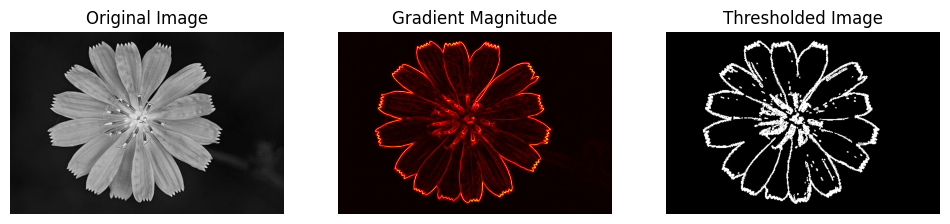

In [6]:
# your code
import numpy as np
import cv2
import matplotlib.pyplot as plt

def two_step_threshold(magnitude, lower_threshold, upper_threshold):
    # Create an output image to store the results
    output = np.zeros_like(magnitude, dtype=np.uint8)

    # Step 1: Initial thresholding - Identify strong edges
    strong_edges = magnitude > lower_threshold

    # Step 2: Final thresholding - Confirm strong edges by checking neighbors
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            if strong_edges[i, j]:
                # Check if neighbors are above the upper threshold
                if magnitude[i, j] > upper_threshold:
                    output[i, j] = 255  # Mark as a strong edge
                else:
                    # Check 8-connected neighbors (if any of them exceed the upper threshold)
                    neighbors = [
                        magnitude[i-1, j-1], magnitude[i-1, j], magnitude[i-1, j+1],
                        magnitude[i, j-1], magnitude[i, j+1],
                        magnitude[i+1, j-1], magnitude[i+1, j], magnitude[i+1, j+1]
                    ]
                    if any(neighbor > upper_threshold for neighbor in neighbors):
                        output[i, j] = 255  # Mark as a final edge

    return output

# Load the image
image_path = '/content/flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator to compute gradients along x and y axes
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
magnitude = cv2.magnitude(sobel_x, sobel_y)

# Define the lower and upper thresholds
lower_threshold = 50  # Example lower threshold
upper_threshold = 150  # Example upper threshold

# Apply two-step thresholding
thresholded_image = two_step_threshold(magnitude, lower_threshold, upper_threshold)

# Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='hot')
plt.title('Gradient Magnitude')
plt.axis('off')

# Thresholded Image
plt.subplot(1, 3, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()


## Test output and Compare with OpenCV_Canny Edges

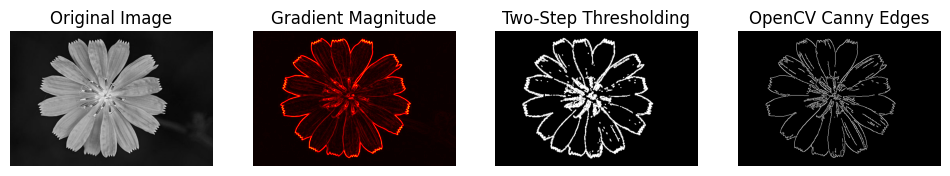

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def two_step_threshold(magnitude, lower_threshold, upper_threshold):
    # Create an output image to store the results
    output = np.zeros_like(magnitude, dtype=np.uint8)

    # Step 1: Initial thresholding - Identify strong edges
    strong_edges = magnitude > lower_threshold

    # Step 2: Final thresholding - Confirm strong edges by checking neighbors
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            if strong_edges[i, j]:
                # Check if neighbors are above the upper threshold
                if magnitude[i, j] > upper_threshold:
                    output[i, j] = 255  # Mark as a strong edge
                else:
                    # Check 8-connected neighbors (if any of them exceed the upper threshold)
                    neighbors = [
                        magnitude[i-1, j-1], magnitude[i-1, j], magnitude[i-1, j+1],
                        magnitude[i, j-1], magnitude[i, j+1],
                        magnitude[i+1, j-1], magnitude[i+1, j], magnitude[i+1, j+1]
                    ]
                    if any(neighbor > upper_threshold for neighbor in neighbors):
                        output[i, j] = 255  # Mark as a final edge

    return output

# Load the image
image_path = '/content/flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator to compute gradients along x and y axes
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
magnitude = cv2.magnitude(sobel_x, sobel_y)

# Define the lower and upper thresholds for two-step thresholding
lower_threshold = 50  # Example lower threshold
upper_threshold = 150  # Example upper threshold

# Apply two-step thresholding
thresholded_image = two_step_threshold(magnitude, lower_threshold, upper_threshold)

# Apply OpenCV's Canny edge detector for comparison
canny_edges = cv2.Canny(image, 100, 200)  # Using default thresholds for Canny

# Display the results for comparison
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(1, 4, 2)
plt.imshow(magnitude, cmap='hot')
plt.title('Gradient Magnitude')
plt.axis('off')

# Two-Step Thresholded Image
plt.subplot(1, 4, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Two-Step Thresholding')
plt.axis('off')

# OpenCV Canny Edges
plt.subplot(1, 4, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('OpenCV Canny Edges')
plt.axis('off')

plt.show()
